# Model Fitness Project

Model Fitness is a gym chain currently developing a data-driven strategy to enhance customer interaction. A significant challenge they face is the loss of customers, commonly known as churn. Identifying when a customer has left is not always straightforward, as some may quietly stop attending without formally canceling their membership.

They need me to analyze customer data and develop a strategy to predict the likelihood of churn for each customer in the coming month. My tasks include creating profiles of typical users, analyzing the factors that most significantly impact churn, and providing recommendations to improve customer retention. Through this project, I will implement machine learning techniques to create a binary classification model and use clustering methods to identify key customer segments.

The ultimate goal is to help Model Fitness reduce churn and improve customer satisfaction by identifying at-risk customers and implementing targeted retention strategies.

## Part 1. Setting up the Dataframe

Let's start by importing libraries:

In [1]:
# Python Standard Libraries
import datetime
import json
import os

# Third Party Libraries
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans

Now I'm uploading the dataframe:

In [2]:
df = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/datasets/gym_churn_us.csv')
df.columns = df.columns.str.strip().str.lower()

Let's see what we've got:

In [3]:
df

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,1,0,1,12,0,33,2.406023,12.0,8,2.284497,2.349070,0
3996,0,1,0,0,1,1,1,29,68.883764,1.0,1,1.277168,0.292859,1
3997,1,1,1,1,1,12,0,28,78.250542,11.0,2,2.786146,2.831439,0
3998,0,1,1,1,1,6,0,32,61.912657,5.0,3,1.630108,1.596237,0


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

Alright, here's what we've got from the data set; here's the column descriptions:

- **Churn** — cancellation for the given month.
- Current dataset fields:
  - Data from the previous month:
    - **gender**.
    - **Near_Location** — whether the user lives or works in the neighborhood where the gym is located.
    - **Partner** — whether the user works at a partner company (the gym has partner companies whose employees receive discounts; in these cases, the gym stores information about the clients' employers).
    - **Promo_friends** — whether the user originally signed up through a “bring a friend” offer (a friend's promotional code was used when they paid for the first membership).
    - **Phone** — whether the user provided a phone number.
    - **Age**.
    - **Lifetime** — the time (in months) since the user first joined the gym.
  - Data from visit and purchase records, as well as information about the current membership status:
    - **Contract_period** — 1 month, 3 months, 6 months, or 1 year.
    - **Month_to_end_contract** — the number of months remaining until the contract expires.
    - **Group_visits** — whether the user participates in group sessions.
    - **Avg_class_frequency_total** — average number of visits per week over the client's lifetime.
    - **Avg_class_frequency_current_month** — average number of visits per week during the current month.
    - **Avg_additional_charges_total** — total amount of money spent on other gym services: cafeteria, sports products, cosmetics, massages, etc.

The dataframe doesn't present missing values.

## Part 2. Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical step in this project as it helps us understand the underlying patterns, relationships, and key features within the customer data. By conducting EDA, we can identify which factors are most closely associated with customer churn, detect any data anomalies, and ensure the data is clean and ready for modeling. This foundational analysis provides the insights needed to build accurate predictive models and develop effective retention strategies for Model Fitness.

### Dataframe Description

Let's review the average values and standard deviation:

In [5]:
print(df.describe())

            gender  near_location      partner  promo_friends        phone  \
count  4000.000000    4000.000000  4000.000000    4000.000000  4000.000000   
mean      0.510250       0.845250     0.486750       0.308500     0.903500   
std       0.499957       0.361711     0.499887       0.461932     0.295313   
min       0.000000       0.000000     0.000000       0.000000     0.000000   
25%       0.000000       1.000000     0.000000       0.000000     1.000000   
50%       1.000000       1.000000     0.000000       0.000000     1.000000   
75%       1.000000       1.000000     1.000000       1.000000     1.000000   
max       1.000000       1.000000     1.000000       1.000000     1.000000   

       contract_period  group_visits          age  \
count      4000.000000   4000.000000  4000.000000   
mean          4.681250      0.412250    29.184250   
std           4.549706      0.492301     3.258367   
min           1.000000      0.000000    18.000000   
25%           1.000000      0.00

The dataset shows a balanced gender distribution and reveals that most customers live near the gym, with almost half being associated with partner companies. The average contract period is about 4.7 months, and the average customer has been with the gym for roughly 3.7 months, showing a mix of short-term and long-term members. Gym usage averages around 1.8 times per week, but some customers show no engagement at all. The churn rate stands at 26.5%, highlighting a significant retention challenge that needs addressing through targeted strategies. The data underscores varying customer commitment levels and potential areas to improve retention efforts.

### Grouped Means

Let's delve what we could get if we observe the mean values of the features in two groups: for people who churned (cancellation) and for those who stayed:

In [6]:
grouped_means = df.groupby('churn').mean()
print(grouped_means)

         gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     
0                               2.0

The grouped means based on churn status reveal notable differences between customers who stayed and those who left. 

* Customers who churned tend to have shorter contract periods, averaging only 1.7 months, compared to 5.7 months for those who stayed. Additionally, churned customers have a significantly lower lifetime at the gym, averaging just under one month, while those who stayed have an average lifetime of about 4.7 months.
* Customers who stayed are more engaged, with higher average class frequencies both in total and in the current month. The average age of churned customers is also lower, around 27 years, compared to nearly 30 years for those who remained. 
* Moreover, churned customers spent less on additional charges and had fewer group visits, indicating lower overall engagement. The data highlights that shorter memberships, lower engagement levels, and younger age groups are more closely associated with churn, suggesting areas for targeted retention efforts.

### Histograms

Now it's turn to plot bar histograms and feature distributions for people who churned (cancellation) and for those who stayed:

<Figure size 1500x1000 with 0 Axes>

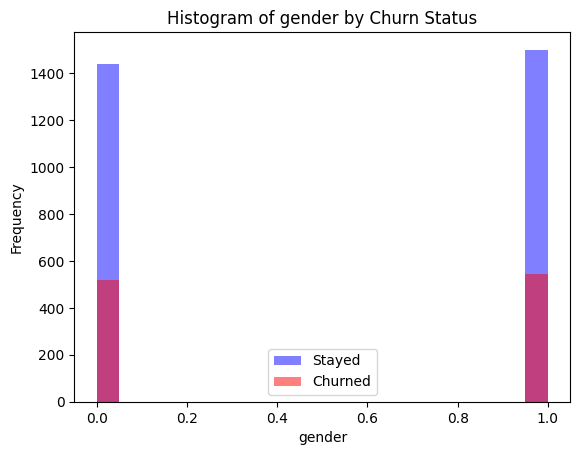

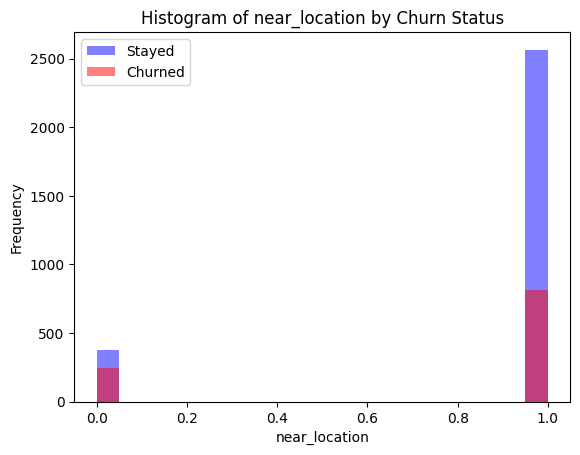

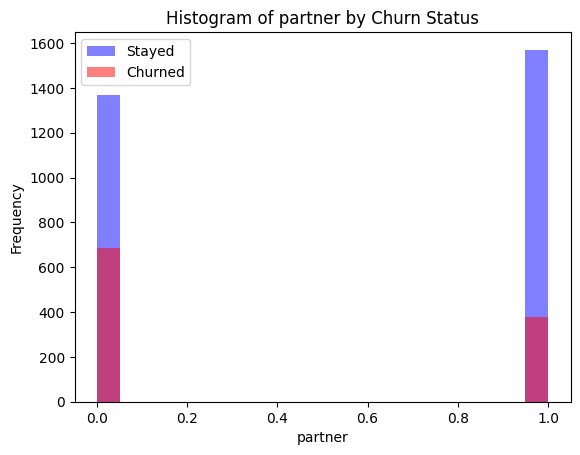

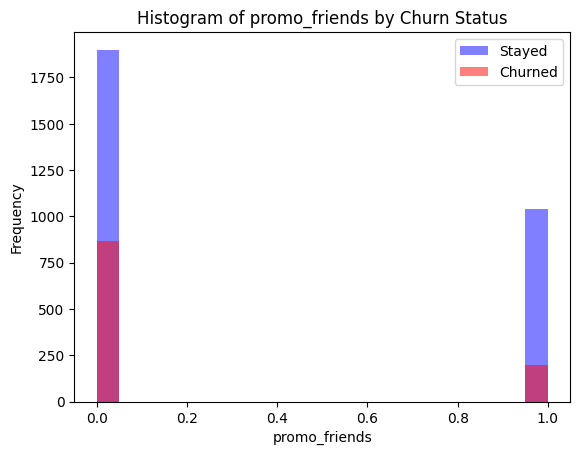

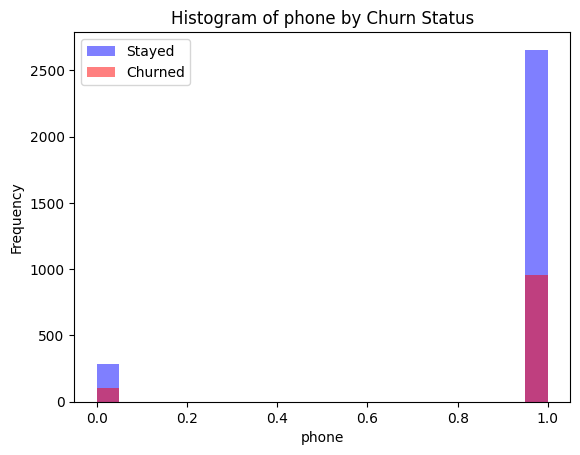

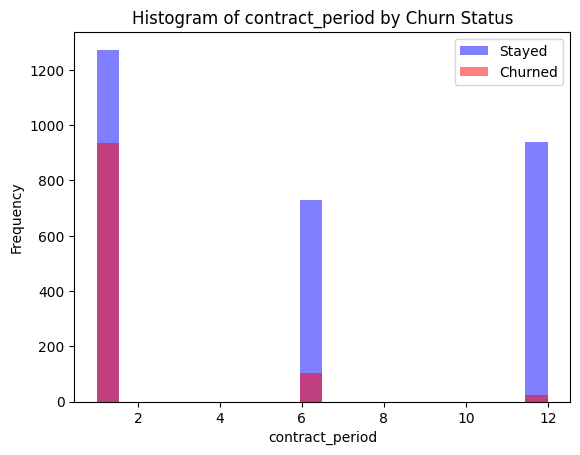

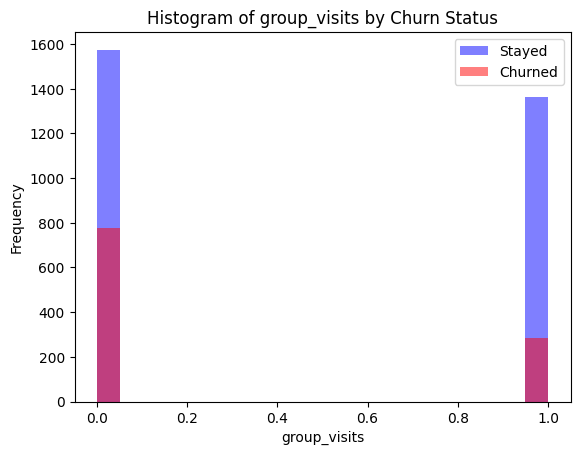

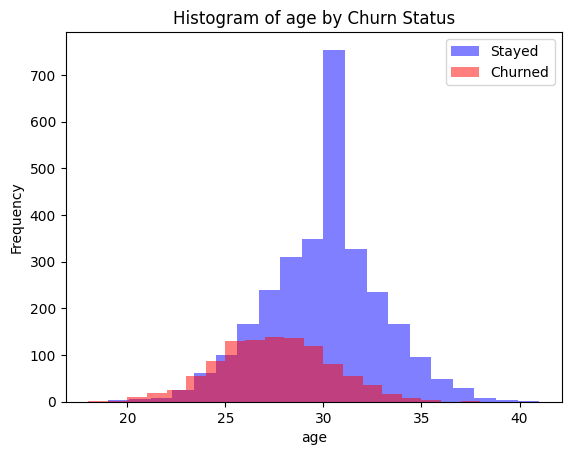

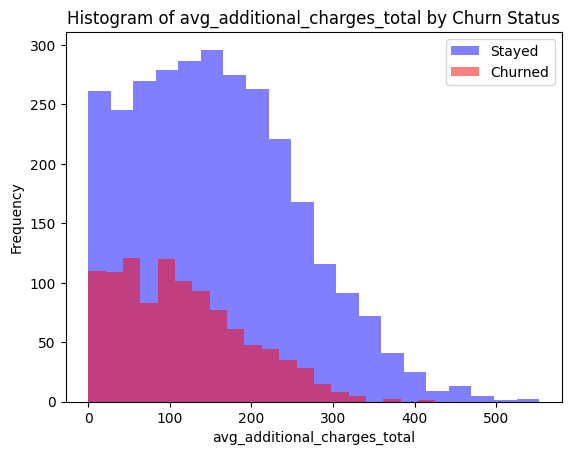

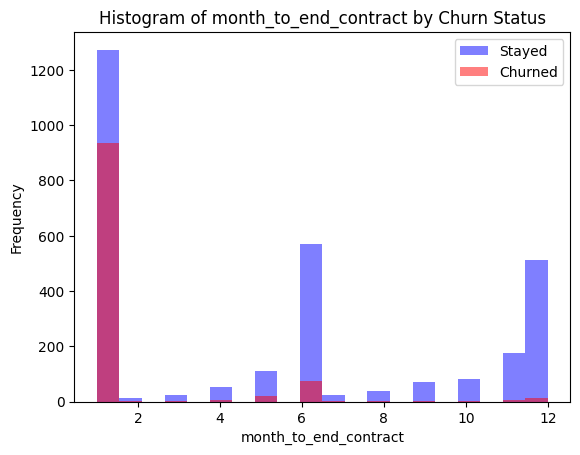

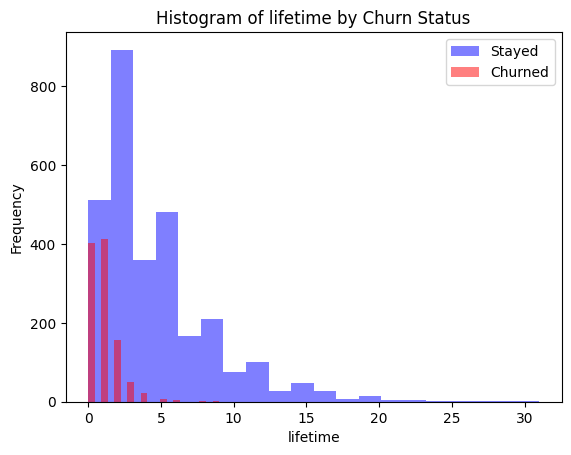

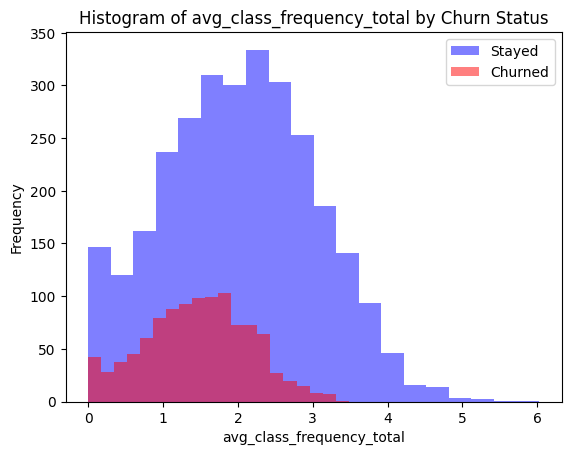

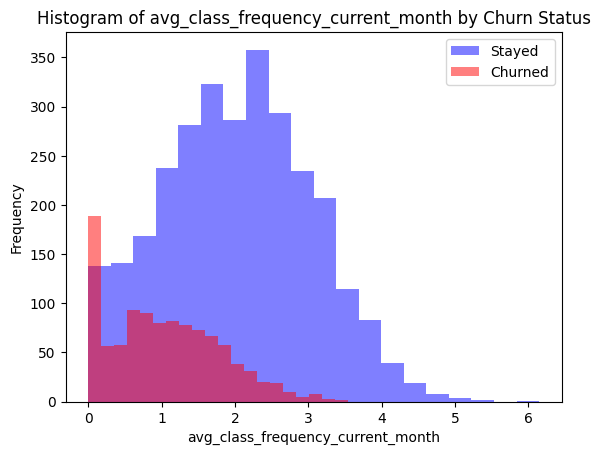

In [7]:
plt.figure(figsize=(15, 10))
for column in df.select_dtypes(include=['int64', 'float64']).columns:
    if column != 'churn':
        plt.figure()
        df[df['churn'] == 0][column].plot(kind='hist', alpha=0.5, color='blue', label='Stayed', bins=20)
        df[df['churn'] == 1][column].plot(kind='hist', alpha=0.5, color='red', label='Churned', bins=20)
        plt.title(f'Histogram of {column} by Churn Status')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

Based on the histograms generated for the Model Fitness customer data, several key observations can be made that provide valuable insights into the factors associated with customer churn.

**Key Observations:**

1. **Lifetime Duration**:
   The histogram for the `lifetime` feature reveals a stark difference between customers who churned and those who stayed. A significant portion of the churned customers had a very short lifetime, often less than 6 months. This suggests that customers who have not established a long-term commitment to the gym are more prone to leaving. The data indicates that early intervention strategies, such as personalized engagement and incentives, might be crucial within the first few months to prevent churn.

2. **Contract Period**:
   The distribution of the `contract_period` feature shows that customers with shorter contract periods (1 or 3 months) are more likely to churn compared to those with longer contracts (6 or 12 months). This is logical, as shorter contracts offer more frequent opportunities for customers to reconsider their membership. This finding supports the strategy of promoting longer contract commitments through discounts or added benefits to enhance customer retention.

3. **Average Class Frequency (Total and Current Month)**:
   Both `avg_class_frequency_total` and `avg_class_frequency_current_month` show that customers who attend the gym more frequently are less likely to churn. Churned customers generally have lower attendance frequencies, with a noticeable drop in the current month’s attendance. This suggests that declining gym usage is a strong predictor of churn. It also emphasizes the importance of monitoring attendance patterns in real-time, allowing the gym to engage with customers showing reduced activity before they decide to leave.

4. **Additional Charges**:
   The `avg_additional_charges_total` feature, which tracks spending on non-membership services such as the cafeteria or personal training, shows that customers who spend more on these additional services are less likely to churn. This indicates that customers who invest in the gym beyond just the membership are more engaged and committed. Offering promotions or bundling services could therefore be an effective strategy to deepen customer engagement and reduce churn.

The patterns observed in the data suggest that churn at Model Fitness is closely linked to both the duration of membership and the level of customer engagement, particularly in terms of gym attendance and additional spending. Customers with shorter memberships and lower engagement levels are at higher risk of leaving. Therefore, to combat churn, it’s essential to focus on improving customer engagement from the outset.

Moreover, the data suggests that Model Fitness should pay close attention to customers whose attendance begins to drop. Early detection of declining engagement, followed by targeted outreach or offers, could help retain these at-risk customers. Additionally, promoting longer-term contracts and encouraging the use of additional services could serve as effective strategies to improve customer retention.

### Correlation Maxtrix

A correlation matrix is essential in this project to identify the relationships between various features and how they impact customer churn. By understanding these correlations, we can pinpoint which factors are most strongly associated with churn, helping us focus on key variables that drive customer behavior. This insight is crucial for building effective predictive models and designing targeted strategies to improve retention at Model Fitness.

In [8]:
correlation_matrix = df.corr()
print(correlation_matrix)

                                     gender  near_location   partner  \
gender                             1.000000       0.006699 -0.010463   
near_location                      0.006699       1.000000 -0.005119   
partner                           -0.010463      -0.005119  1.000000   
promo_friends                     -0.005033       0.210964  0.451960   
phone                             -0.008542      -0.015763  0.009970   
contract_period                    0.000502       0.150233  0.306166   
group_visits                       0.017879       0.154728  0.022710   
age                                0.013807       0.058358  0.047480   
avg_additional_charges_total      -0.009334       0.040761  0.022941   
month_to_end_contract             -0.001281       0.143961  0.294632   
lifetime                           0.013579       0.070921  0.061229   
avg_class_frequency_total          0.014620       0.043127  0.024938   
avg_class_frequency_current_month  0.009156       0.062664  0.04

Based on the correlation matrix you provided, several key observations and insights can be drawn, which offer valuable understanding into the relationships between the features in the dataset and their impact on customer churn.

**Key Observations:**

1. **Negative Correlation with Churn**:
   - **Lifetime (-0.438)**: The strongest negative correlation with churn is observed with the `lifetime` feature. This suggests that customers who have been with the gym for a longer period are less likely to churn. The longer a customer stays, the more ingrained their habits and loyalty to the gym become, reducing the likelihood of leaving.
   - **Avg_class_frequency_current_month (-0.412)** and **Avg_class_frequency_total (-0.249)**: Both the current month's average class frequency and the total average frequency show a significant negative correlation with churn. This implies that customers who attend the gym more frequently are less likely to churn, reinforcing the idea that higher engagement leads to greater retention.
   - **Contract_period (-0.390)** and **Month_to_end_contract (-0.381)**: Customers with longer contract periods and those who are further from their contract end date are also less likely to churn. This could be due to the financial and psychological commitment associated with longer contracts, which discourages customers from leaving before their contract expires.

2. **Positive Correlations among Features**:
   - **Contract_period and Month_to_end_contract (0.973)**: There is a very strong positive correlation between `contract_period` and `month_to_end_contract`, which is expected because these features are closely related—longer contract periods naturally result in more months left on the contract.
   - **Promo_friends and Partner (0.452)**: The positive correlation between `promo_friends` and `partner` suggests that customers who joined the gym through a friend referral are often those who work at a partner company. This could imply that social influences and corporate partnerships are effective channels for acquiring new customers.

3. **Low or No Correlation**:
   - **Gender (0.001)**: The `gender` feature shows almost no correlation with churn, indicating that gender does not play a significant role in whether a customer decides to leave the gym.
   - **Phone (-0.001)**: Similarly, the `phone` feature, which indicates whether the customer provided a phone number, shows no meaningful correlation with churn. This suggests that simply having a phone number on file does not impact retention.

**Some insights:**

The correlations highlight several factors that are crucial to understanding customer behavior at Model Fitness. The strong negative correlations with churn suggest that customer engagement, in terms of frequent gym visits and longer memberships, is vital to retention. Customers who are more engaged and committed (both financially and habitually) are less likely to churn, which aligns with general industry understanding that higher engagement typically leads to better retention.

The relationship between `promo_friends` and `partner` suggests that leveraging social networks and corporate partnerships could be effective strategies for acquiring and retaining customers. However, the low correlation with churn indicates that these acquisition strategies may not significantly impact long-term retention, which further emphasizes the importance of driving ongoing engagement after the initial signup.

## Part 3. Build a model to predict customer churn

In this section, we aim to create a binary classification model to predict whether a gym member will churn in the following month. 

To achieve this, we will: 

- Split the data into training and validation sets 
- Train the models using Logistic Regression and Random Forest methods
- Evaluate their performance using accuracy, precision, and recall metrics. 

By comparing these models, we will identify which method yields better results, providing valuable insights into the factors that influence customer retention at Model Fitness.

### Spliting the data into training and validation sets

We began by splitting the dataset into training and validation sets using the **train_test_split()** function. This step is crucial as it allows us to train the model on one portion of the data and validate its performance on unseen data, ensuring that the model can generalize well to new cases. 

In our setup, the features (X) were separated from the target variable (churn), and the split was performed with a test size of 20%, maintaining consistency by setting the random_state parameter to 42.

In [9]:
# Here we define the features (X) and the target (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Then we split the data into training and validation sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Train the model

Next, we are going to train two different models: Logistic Regression and Random Forest. 

Both models were initialized with a random_state parameter set to 42 to ensure reproducibility of results. The models were then trained on the training set, allowing them to learn the patterns and relationships between the features and the target variable. 

Additionally, we scaled the data using a StandardScaler to improve the performance of the Logistic Regression model, as this algorithm often benefits from standardized input features.

In [10]:
# Let's initialize the models
logreg_model = LogisticRegression(random_state=42)
rf_model = RandomForestClassifier(random_state=42)

# Then we train the models
logreg_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

/Users/leobabel/anaconda3/envs/py312/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier(random_state=42)

In [11]:
# Let's scale the data using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and validation sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Evaluate the accuracy, precision, and recall for both models

To evaluate the models, we re-scaled the training and validation sets while retaining feature names, and then re-trained the Logistic Regression model on the scaled data. Predictions were made on the validation set, and the model’s performance was assessed using accuracy, precision, and recall metrics. 

In [12]:
# Let's Re-scale the data ensuring feature names are retained
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

# Let's Re-train the Logistic Regression model
logreg_model.fit(X_train_scaled_df, y_train)

# Time to make predictions with the updated model
logreg_predictions = logreg_model.predict(X_test_scaled_df)

# Finally, evaluate the updated Logistic Regression model
logreg_accuracy = accuracy_score(y_test, logreg_predictions)
logreg_precision = precision_score(y_test, logreg_predictions)
logreg_recall = recall_score(y_test, logreg_predictions)

print("Logistic Regression (Scaled with Feature Names) - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}".format(logreg_accuracy, logreg_precision, logreg_recall))


Logistic Regression (Scaled with Feature Names) - Accuracy: 0.92, Precision: 0.87, Recall: 0.78


In [13]:
# Evaluation of the Random Forest model using the validation data
rf_predictions = rf_model.predict(X_test)

# Evaluation of the Random Forest model's performance
rf_accuracy = accuracy_score(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions)
rf_recall = recall_score(y_test, rf_predictions)

print("Random Forest - Accuracy: {:.2f}, Precision: {:.2f}, Recall: {:.2f}".format(rf_accuracy, rf_precision, rf_recall))


Random Forest - Accuracy: 0.91, Precision: 0.85, Recall: 0.78


The Logistic Regression model showed strong performance:

- Accuracy of 92%
- Precision of 87%
- Recall of 78%.

For its part, the Random Forest model demonstrated solid performance:

- Accuracy of 91%
- Precision of 85%
- Recall of 78%.

These metrics are comparable, indicating that both models are effective at distinguishing between churned and non-churned customers. Although the Random Forest model's accuracy and precision are slightly lower, the recall is identical to that of the Logistic Regression model, suggesting both models are reliable for predicting customer churn. This consistency in recall is particularly valuable for retention strategies, as it demonstrates the models' ability to consistently identify a significant proportion of at-risk customers.

Through this process, we successfully developed and evaluated predictive models for customer churn at Model Fitness using both Logistic Regression and Random Forest. Both models demonstrated strong performance, with Logistic Regression showing slightly higher accuracy and precision, while Random Forest matched the recall. This suggests that both models effectively identify customers at risk of leaving, providing a reliable foundation for implementing targeted retention strategies. These results will enable Model Fitness to proactively address churn, enhance customer engagement, and ultimately improve overall retention. This predictive approach offers valuable insights into customer behavior and is a critical tool in shaping effective customer interaction strategies.

## Part 4: Create User Clusters

In this section, we aim to create user clusters to better understand the distinct groups within our customer base at Model Fitness. By identifying these clusters, we can uncover patterns and behaviors that differentiate loyal customers from those at risk of churning.

We start by standardizing the data, excluding the churn column, to ensure that all features contribute equally to the clustering process. Next, we use the linkage() function to create a distance matrix and plot a dendrogram, which helps us estimate the optimal number of clusters. Based on these insights, we train a clustering model using the K-means algorithm and set the number of clusters to five for comparative analysis.

By examining the mean feature values, distributions, and churn rates across these clusters, we can identify key characteristics and retention risks associated with each group. This clustering approach provides valuable insights that enable us to develop targeted strategies to enhance customer retention and engagement.

### Step 1: Standardize the Data

First, we will standardize the data to ensure that all features contribute equally to the clustering process. For this, we are exluding the churn column

In [14]:
X_clustering = df.drop('churn', axis=1)
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X_clustering)

### Step 2: Creating a Distance Matrix and Plot a Dendrogram

In this step, we use the linkage() function from the scipy library to create a distance matrix and plot a dendrogram. For our project, this helps us visualize how similar or different the gym members are from one another, allowing us to estimate the optimal number of clusters. By identifying these natural groupings, we can better understand customer behavior and tailor our retention strategies more effectively, making this a critical step in our analysis.

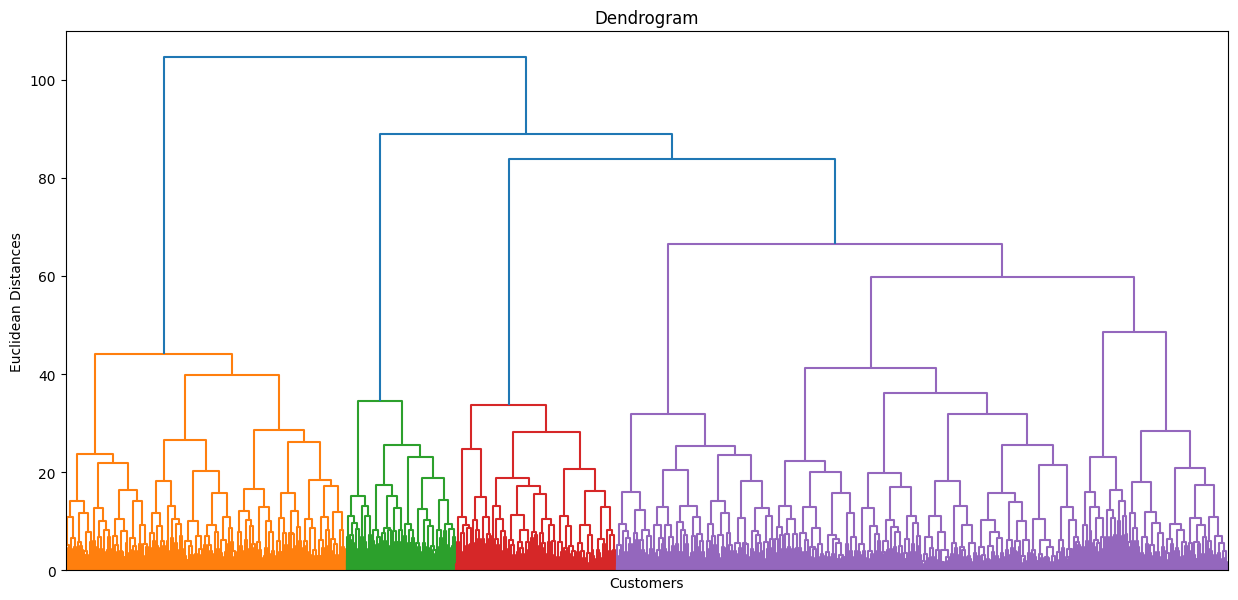

In [15]:
linkage_matrix = linkage(X_standardized, method='ward')

plt.figure(figsize=(15, 7))
dendrogram(linkage_matrix, no_labels=True)  # I Set no_labels=True in order to suppress customer labels because they looked like shit, all squeezed
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

Alright, here we have a visual representation of how the gym's customers can be grouped into distinct clusters based on their behavior and characteristics. In this dendrogram, five main clusters are identifiable, aligning with the guidance to use five clusters for further analysis.

Let’s continue with the project outline before assigning names to the clusters. We’ll follow the steps as stated to ensure a thorough analysis before labeling each cluster appropriately.

### Step 3: Training the Clustering Model Using K-means

In this step, we train the K-means clustering model using the number of clusters determined from the dendrogram, set at n=5. This approach allows us to group customers into distinct clusters based on their standardized features, enabling us to identify patterns and similarities within each cluster. By doing so, we can better understand the diverse needs and behaviors of different customer segments, which is essential for developing targeted strategies to improve customer retention and engagement at Model Fitness.

In [16]:
# Setting the number of clusters to 5
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(X_standardized)

# Adding cluster labels to the original dataframe
df['cluster'] = clusters

### Step 4: Analyzing the Mean Feature Values for Each Cluster

Let's examine the mean values of the features for each cluster to identify any distinct patterns.

In [17]:
cluster_means = df.groupby('cluster').mean()
print(cluster_means)

           gender  near_location   partner  promo_friends     phone  \
cluster                                                               
0        0.484801       0.698363  0.301637       0.007015  0.899454   
1        0.494471       0.947867  0.791469       0.998420  0.906793   
2        0.464396       0.913313  0.766254       0.493808  0.925697   
3        0.547794       0.937500  0.742647       0.424632  0.863971   
4        0.568233       0.878076  0.178971       0.048098  0.914989   

         contract_period  group_visits        age  \
cluster                                             
0               1.733437      0.255651  28.074825   
1               2.740916      0.431280  28.903633   
2              10.495356      0.506192  30.091331   
3              11.194853      0.575368  29.720588   
4               2.120805      0.456376  29.993289   

         avg_additional_charges_total  month_to_end_contract  lifetime  \
cluster                                                 

### Step 5: Calculating the Churn Rate for Each Cluster

By calculating the churn rate for each cluster, we can pinpoint which groups are more prone to leaving and tailor our retention strategies accordingly.

In [18]:
churn_rate_per_cluster = df.groupby('cluster')['churn'].mean()
print(churn_rate_per_cluster)

cluster
0    0.587685
1    0.285940
2    0.013932
3    0.042279
4    0.105145
Name: churn, dtype: float64


### Step 6: Naming Clusters

The analysis of mean feature values for each cluster and its churn rates uncovers distinct customer profiles, each with unique behaviors and characteristics. By naming and defining these clusters, we can better understand the differences in engagement and commitment among gym members, allowing us to tailor retention strategies more effectively.

**Cluster 0: "Newcomers"**
- This cluster represents users who are relatively new to the gym, with short contract periods, low lifetime, and minimal participation in promotional offers with friends. They have the highest churn rate at 58.8%, suggesting they are less engaged with the gym's offerings and more likely to cancel their membership early. Their lower frequency of group visits further indicates a lack of commitment and connection to the gym community.

**Cluster 1: "Casual Users"**
- **Profile**: This cluster includes members who engage occasionally, often visiting locations near them and participating actively in promotional activities with friends. They have moderate contract periods and class frequency, with a churn rate of 28.6%. This suggests they are moderately connected to the gym's services but still at risk of leaving, highlighting the potential for improved retention strategies.

**Cluster 2: **"Dedicated Loyalists"**
- **Profile**: Cluster 2 has the lowest churn rate at 1.4%, featuring highly loyal and engaged members. These customers have the longest contract periods, highest frequency of visits, and the greatest lifetime membership. Their consistent high class attendance reflects a strong commitment to the gym, making them the most steadfast group.

**Cluster 3: **"Long-term Achievers"**
- **Profile**: Cluster 3, with a low churn rate of 4.2%, includes users who share many traits with the "Dedicated Loyalists," such as longer contract periods and significant lifetime memberships. However, they show slightly lower class frequency and group visit participation. Despite these differences, their overall engagement and commitment remain strong, positioning them as another reliable and loyal customer segment.

**Cluster 4: **"Seasonal Enthusiasts"**
- **Profile**: Cluster 4, which has a moderate churn rate of 10.5%, consists of customers who are relatively engaged but have shorter contract periods and less frequent participation in promotional activities compared to Clusters 2 and 3. These members display varying commitment levels, with gym attendance that can be less consistent and more seasonal. Despite their moderate engagement, they show potential for increased retention with targeted strategies to enhance their connection to the gym.

These insights highlight the need for customized retention strategies, focusing on re-engaging customers in higher-risk clusters through targeted promotions, personalized offers, and strategies to increase contract duration. By addressing the specific needs of each group, we can enhance overall member loyalty and reduce churn.

### Step 7: Plotting Feature Distributions Across Clusters

To gain deeper insights into the behaviors and characteristics of each cluster, we will plot the distributions of various features across the clusters. This will help us visually identify patterns, variations, and key differences that can inform our retention strategies.

By the way, we'll start by labeling the clusters in order to observe more clearly the distinct characteristics and behaviors of each group, helping us to identify key differences and patterns that will guide targeted retention strategies:

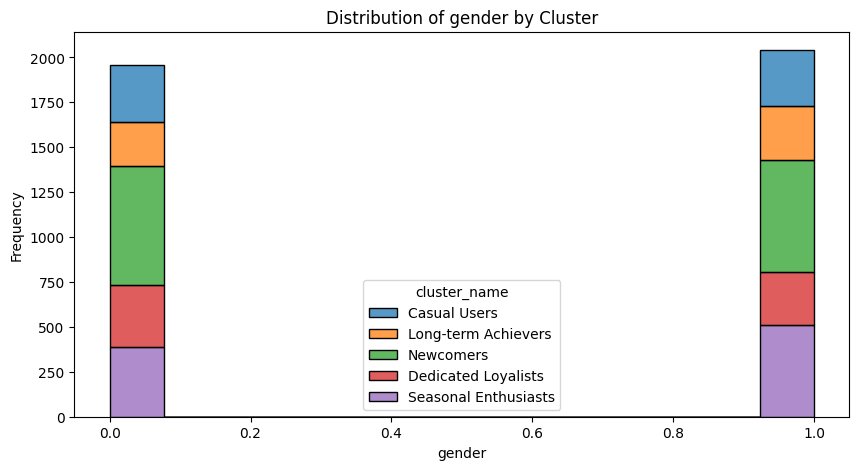

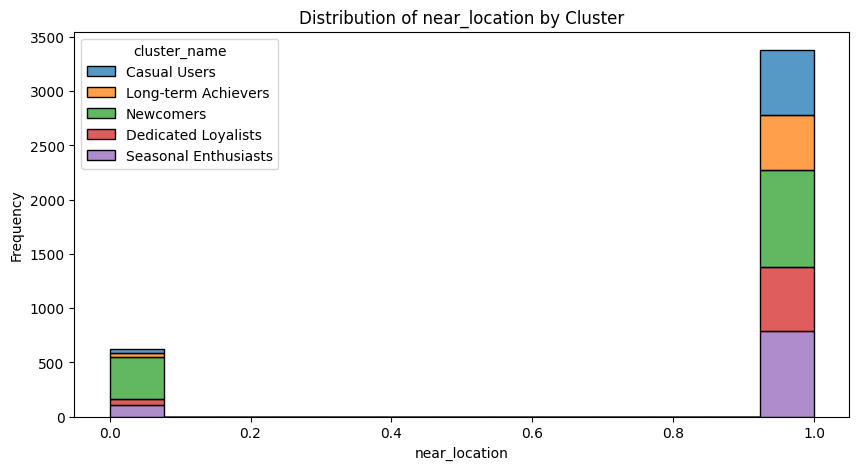

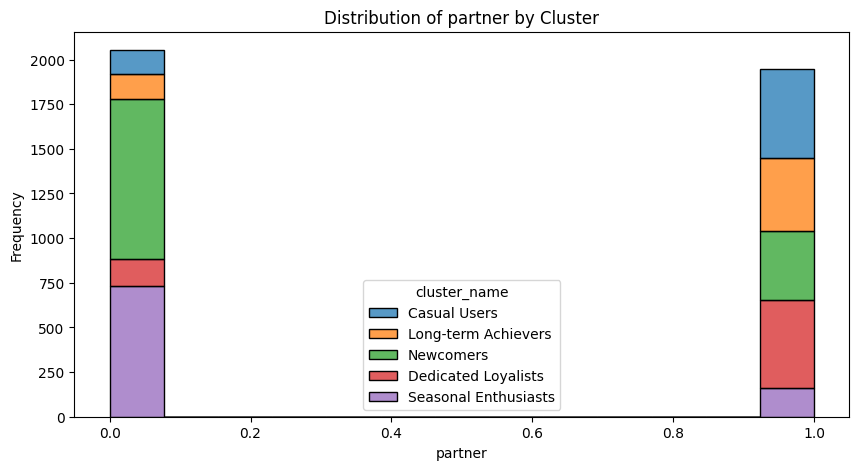

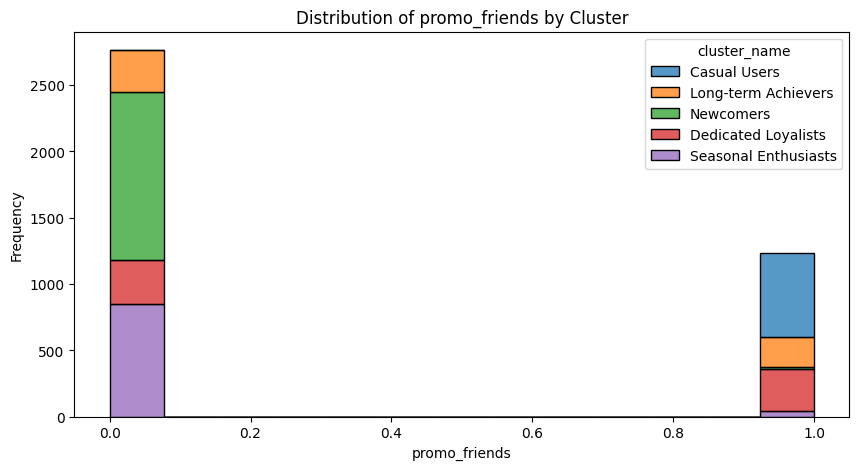

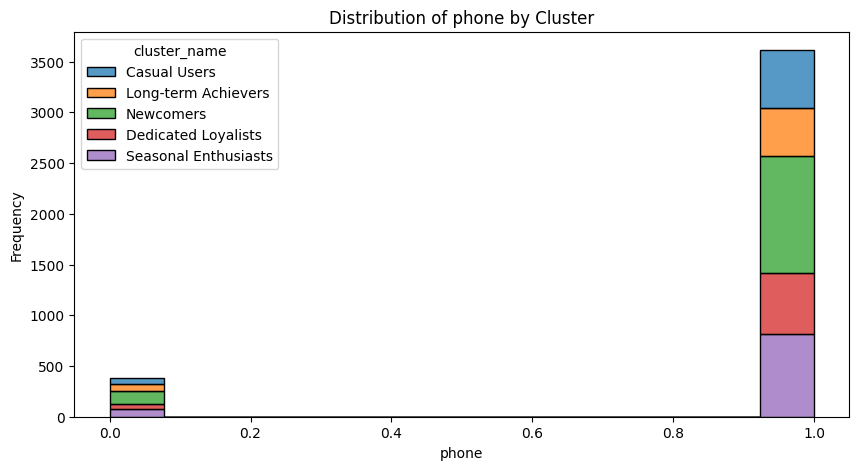

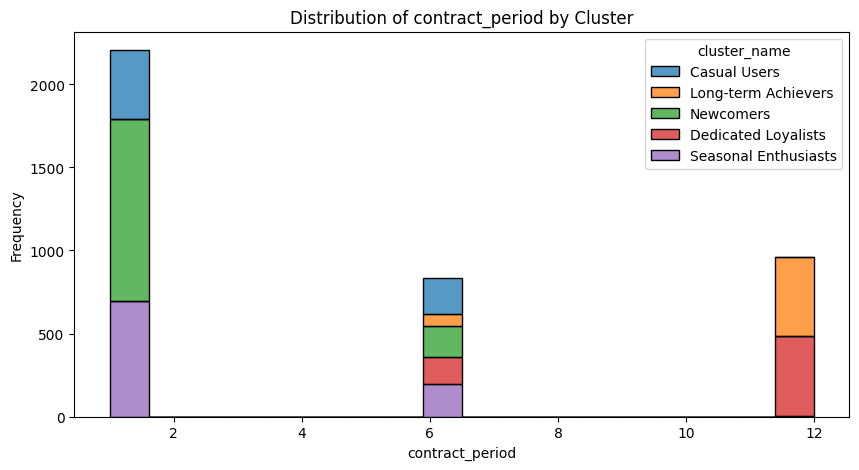

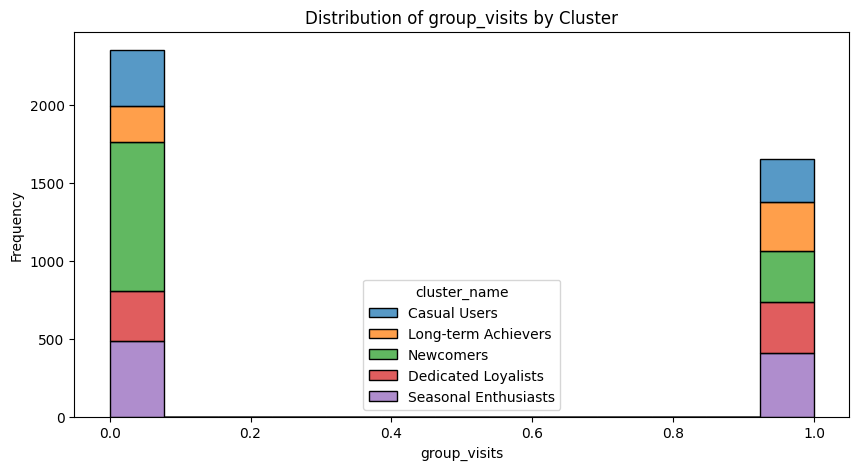

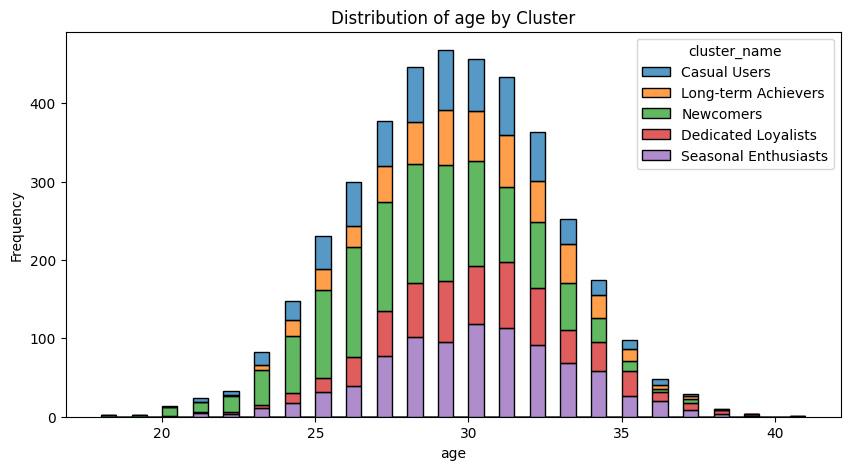

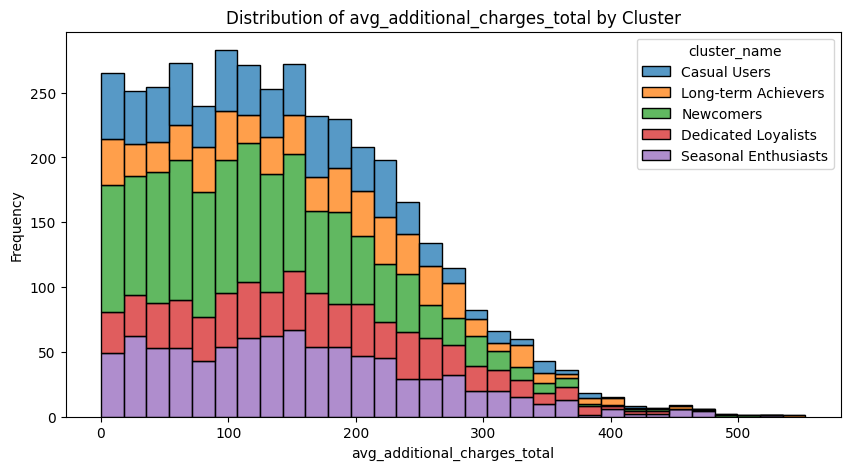

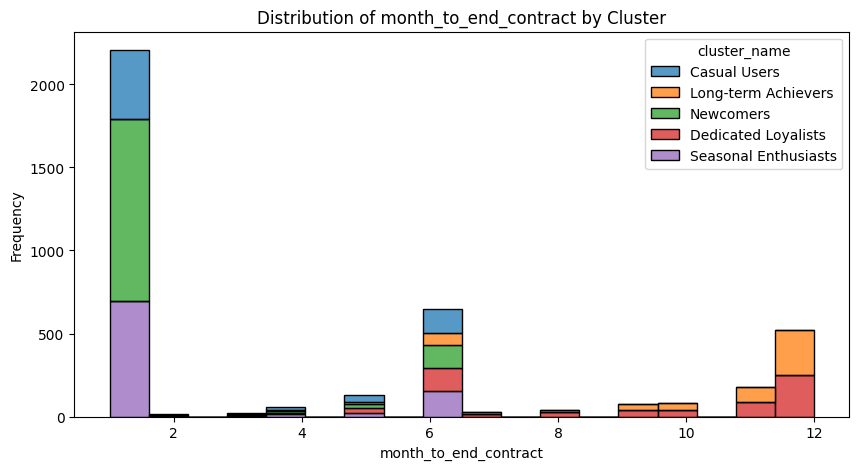

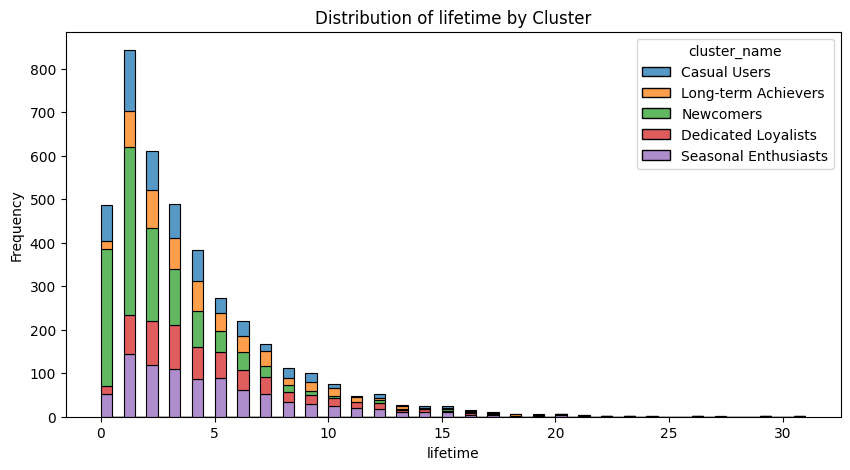

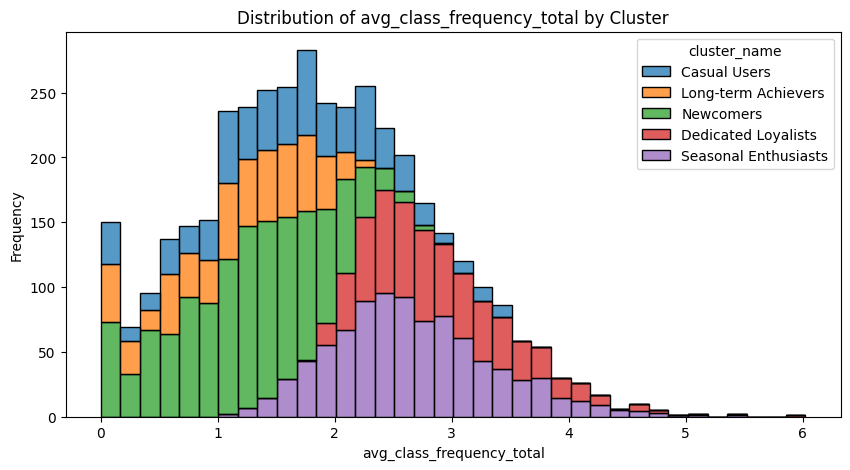

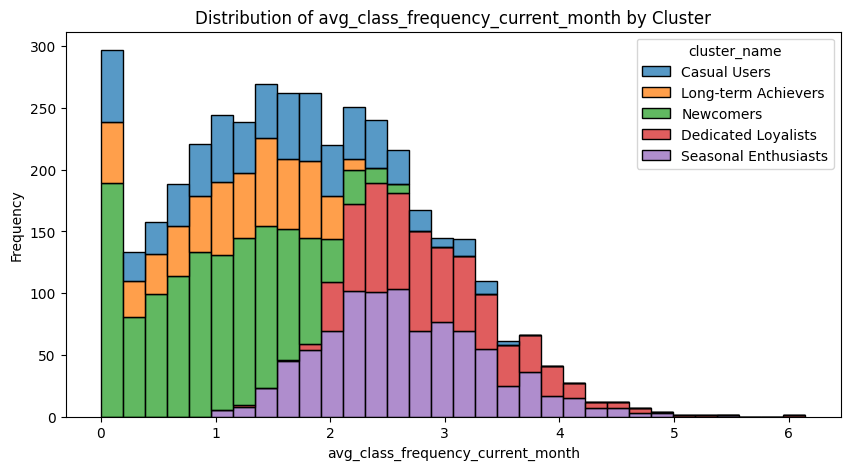

In [19]:
cluster_names = {
    0: "Newcomers",
    1: "Casual Users",
    2: "Dedicated Loyalists",
    3: "Long-term Achievers",
    4: "Seasonal Enthusiasts"
}

# Map the cluster numbers in the dataframe to the descriptive names
df['cluster_name'] = df['cluster'].map(cluster_names)

for column in X_clustering.columns:
    plt.figure(figsize=(10, 5))
    sns.histplot(data=df, x=column, hue='cluster_name', multiple='stack', palette='tab10')
    plt.title(f'Distribution of {column} by Cluster')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


Alright, time to wrap up with our conclusions:

## Part 5: Conclusions and Basic Recommendations

Based on our analysis, we can make targeted recommendations for customer interaction and retention strategies, focusing on the unique characteristics of each cluster:

### Cluster 0: **"Newcomers"**
- **Characteristics**:
  - Average contract period: 1.7 months
  - Low participation in group visits (25.6%)
  - Average age: 28
  - Average class frequency is low, both overall and currently (around 1.25)
  - They rarely join through friend promotions
  - Many members do not live near the gym, which might contribute to their higher churn rate.
- **Retention Strategy**: Focus on engaging them early with personalized offers, onboarding programs, or trial extensions to increase their initial commitment and mitigate location-related barriers.

### Cluster 1: **"Casual Users"**
- **Characteristics**:
  - Average contract period: 2.7 months
  - Moderate group visits participation (43.1%)
  - Average age: 28.9
  - Moderate use of friend promotions (close to 100%)
  - Average class frequency is moderate (1.6 overall)
  - Heavy use of friend promotions (close to 100%), enhancing their social engagement
  - Mostly live near the gym, contributing to moderate retention
- **Retention Strategy**: Provide incentives for increased usage, such as loyalty rewards or encouragement to join group classes, which may improve their overall experience and commitment.

### Cluster 2: **"Dedicated Loyalists"**
- **Characteristics**:
  - Average contract period: 10.5 months
  - High participation in group visits (50.6%)
  - Average age: 30.1
  - High frequency of class attendance (around 2.9 both overall and currently)
  - Moderate use of friend promotions
- **Retention Strategy**: Maintain satisfaction through recognition, exclusive perks, and programs that cater to their high engagement levels to keep them loyal.

### Cluster 3: **"Long-term Achievers"**
- **Characteristics**:
  - Average contract period: 11.2 months
  - High participation in group visits (57.5%)
  - Average age: 29.7
  - Slightly lower class frequency (around 1.15)
  - Less use of friend promotions
  - Most members live near the gym, aiding their long-term retention
- **Retention Strategy**: Engage these users with advanced classes or personal training options that align with their long-term fitness goals, enhancing their overall experience and commitment.

### Cluster 4: **"Seasonal Enthusiasts"**
- **Characteristics**:
  - Average contract period: 2.1 months
  - Moderate participation in group visits (45.6%)
  - Average age: 29.9
  - Class frequency is fairly high (around 2.7 both overall and currently)
  - Minimal use of friend promotions
  - A significant portion lives near the gym, supporting their seasonal attendance
- **Retention Strategy**: Offer seasonal promotions, flexible memberships, or packages that cater to their peak interest periods to maximize engagement during high-activity phases.

The distribution plots highlight key behavioral patterns, emphasizing the role of location proximity, social engagement, and consistent gym activity in retaining members. Tailoring retention strategies to the specific characteristics and behaviors of each cluster will enable Model Fitness to address churn more effectively and foster a more committed member base.